<a href="https://colab.research.google.com/github/NguyenthanhTung14/Nguy-nThanhT-ng/blob/main/ngay10_4_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SyntaxError: ignored

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                       

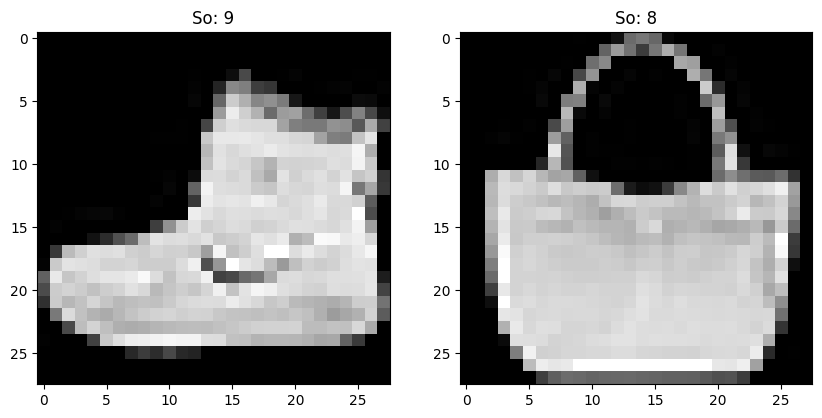

In [1]:
from keras.datasets.fashion_mnist import load_data #dấu chấm là đường dẫn

(train_X, train_Y), (test_X, test_Y) = load_data()

print(train_X.shape)
print(test_X.shape)

from matplotlib import pyplot as plt
plt.figure(figsize = [10,10])
plt.subplot(121)
plt.imshow(train_X[0],cmap ='gray')
plt.title('So: {}'.format(train_Y[0]))
plt.subplot(122)
plt.imshow(train_X[100],cmap ='gray')
plt.title('So: {}'.format(train_Y[100]))

train_X = train_X.reshape(60000,28,28,1)
test_X = test_X.reshape(10000,28,28,1)
print(train_X.shape)
print(test_X.shape)

train_X = train_X.astype('float32')
train_X = train_X/255
test_X = test_X.astype('float32')
test_X = test_X/255

from keras.utils import to_categorical
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input

from keras.optimizers import Adam
batch_size = 64 
epochs = 24 
classes = 10

#CNN
from keras.layers import LeakyReLU

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation= 'linear',input_shape = (28,28,1),padding = 'same'))
model.add(LeakyReLU(alpha =0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation='linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation='linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.summary()

#ANN
from keras import losses

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha =0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss = losses.categorical_crossentropy,optimizer=Adam(),metrics = ['accuracy'])
model.summary()
train = model.fit(train_X,train_Y,batch_size=batch_size,epochs=epochs,verbose=1)

test_acc,test_loss = model.evaluate(test_X, test_Y)

print("test_acc",test_acc)
print("test_loss",test_loss)

In [2]:
#Lưu model lại
model.save('fashionmnist.h5')

In [4]:
#Tải model lưu lên drive
from google.colab import drive
drive.mount('/content/drive')
!cp fashionmnist.h5 "/content/drive/MyDrive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
